## Spotify App Reviews Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [4]:

from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['reviews.csv']))
print(df)

Saving reviews.csv to reviews.csv
            Time_submitted                                             Review  \
0      2022-07-09 15:00:00  Great music service, the audio is high quality...   
1      2022-07-09 14:21:22  Please ignore previous negative rating. This a...   
2      2022-07-09 13:27:32  This pop-up "Get the best Spotify experience o...   
3      2022-07-09 13:26:45    Really buggy and terrible to use as of recently   
4      2022-07-09 13:20:49  Dear Spotify why do I get songs that I didn't ...   
...                    ...                                                ...   
61589  2022-01-01 03:01:29  Even though it was communicated that lyrics fe...   
61590  2022-01-01 02:13:40  Use to be sooo good back when I had it, and wh...   
61591  2022-01-01 01:02:29  This app would be good if not for it taking ov...   
61592  2022-01-01 00:49:23  The app is good hard to navigate and won't jus...   
61593  2022-01-01 00:19:09  Its good but sometimes it doesnt load the musi.

### Data PreProcessing

In [7]:
stf = df.copy()

In [5]:
import gensim
from gensim.parsing.preprocessing import strip_non_alphanum, strip_multiple_whitespaces, preprocess_string, split_alphanum, strip_short, strip_numeric
import re 
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def lower_case(docs):
  return [doc.lower() for doc in docs]

# Loai bo dau cau & ki tu dac biet
def remove_punc(docs):
  return [strip_non_alphanum(doc).strip() for doc in docs]

# Tach cac so va chu lien nhau
def separate_num(docs):
  return [split_alphanum(doc) for doc in docs]

def remove_one_letter_word(docs):
  return [strip_short(doc) for doc in docs]

def remove_number(docs):
  return [strip_numeric(doc) for doc in docs]

# Thay the nhieu spaces bang mot space
def replace_multiple_whitespaces(docs):
  return [strip_multiple_whitespaces(doc) for doc in docs]

def remove_stopwords(docs):
    return [" ".join([word for word in doc.split() if word not in stop_words]) for doc in docs]

doc = lower_case(stf['Review'])
doc = remove_punc(doc)
doc = separate_num(doc)
doc = remove_one_letter_word(doc)
doc = remove_number(doc)
doc = replace_multiple_whitespaces(doc)
doc = remove_stopwords(doc)

stf['Review'] = doc

In [9]:
stf.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,great music service audio high quality app eas...,5,2,NaN
1,2022-07-09 14:21:22,please ignore previous negative rating app sup...,5,1,NaN
2,2022-07-09 13:27:32,pop get best spotify experience android annoyi...,4,0,NaN
3,2022-07-09 13:26:45,really buggy terrible use recently,1,1,NaN
4,2022-07-09 13:20:49,dear spotify get songs put playlist shuffle play,1,1,NaN


In [10]:
stf1 = stf.copy()
rate = [1,2,3,4,5]
sentiment = [0, 0, 1, 1, 1]
for i in range(5):
    stf1["Rating"].replace(rate[i], sentiment[i],inplace=True)

In [11]:
stf1.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,great music service audio high quality app eas...,1,2,NaN
1,2022-07-09 14:21:22,please ignore previous negative rating app sup...,1,1,NaN
2,2022-07-09 13:27:32,pop get best spotify experience android annoyi...,1,0,NaN
3,2022-07-09 13:26:45,really buggy terrible use recently,0,1,NaN
4,2022-07-09 13:20:49,dear spotify get songs put playlist shuffle play,0,1,NaN


### RNN

In [12]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Bidirectional, Dense, Embedding
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
import numpy as np
from sklearn.model_selection import train_test_split

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
# Prepare the dataset
x_train, x_test, y_train, y_test = train_test_split(stf1['Review'], stf1['Rating'], test_size=0.2, random_state=42)
print(x_train[0])

# Tokenize the data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
print(x_train[0])
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)
print(x_train[0])

# Pad the sequences to make all inputs the same length
max_length = max([len(s) for s in x_train])
print(max_length)

great music service audio high quality app easy use also quick friendly support
great music service audio high quality app easy use also quick friendly support
[816, 3, 13, 71, 162, 1062, 1418, 2717, 516, 317, 285, 61]
311


In [15]:
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

In [16]:
x_valid, y_valid = x_train[:64], y_train[:64]
x_train_, y_train_ = x_train[64:], y_train[64:]

In [17]:
x_train[0]

array([ 816,    3,   13,   71,  162, 1062, 1418, 2717,  516,  317,  285,
         61,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

#### simple RNN (Vanilla RNN)

In [19]:
# fixing every word's embedding size to be 32
embd_len = 32

# Creating a RNN model
RNN_model = Sequential(name="Simple_RNN")
RNN_model.add(Embedding(len(tokenizer.word_index)+1, embd_len, input_length=max_length))

# In case of a stacked(more than one layer of RNN)
# use return_sequences=True
RNN_model.add(SimpleRNN(128, activation='tanh', return_sequences=False))
RNN_model.add(Dense(1, activation='sigmoid'))

# printing model summary
print(RNN_model.summary())

# Compiling model
RNN_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Training the model
history = RNN_model.fit(x_train_, y_train_, batch_size=64, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("Simple_RNN Score---> ", RNN_model.evaluate(x_test, y_test, verbose=0))


Model: "Simple_RNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 311, 32)           636544    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               20608     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 657,281
Trainable params: 657,281
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
769/769 [==============================] - 149s 192ms/step - loss: 0.6792 - accuracy: 0.5875 - val_loss: 0.6585 - val_accuracy: 0.6719
Epoch 2/5
769/769 [==============================] - 143s 186ms/step - loss: 0.6615 - accuracy: 0.6095 - val_loss: 0.6540 - val_accuracy: 0.6875
Epoch 3/5
769/769 [

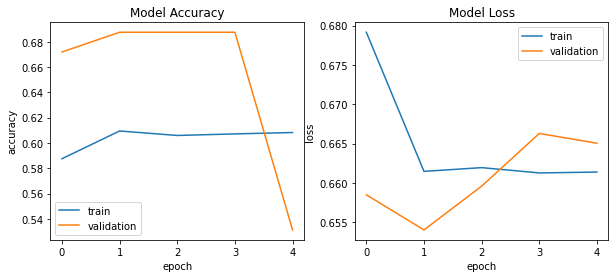

In [20]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

#### GRU (Gated Recurent Units)

In [ ]:
# Defining GRU model
gru_model = Sequential(name="GRU_Model")
gru_model.add(Embedding(len(tokenizer.word_index)+1, embd_len, input_length=max_length))
gru_model.add(GRU(128, activation='tanh', return_sequences=False))
gru_model.add(Dense(1, activation='sigmoid'))

# Printing the Summary
print(gru_model.summary())

# Compiling the model
gru_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Training the GRU model
history2 = gru_model.fit(x_train_, y_train_, batch_size=64, epochs=5, verbose=1, validation_data=(x_valid, y_valid))

# Printing model score on test data
print()
print("GRU model Score---> ", gru_model.evaluate(x_test, y_test, verbose=0))


Model: "GRU_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 311, 32)           636544    
                                                                 
 gru (GRU)                   (None, 128)               62208     
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 698,881
Trainable params: 698,881
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/5
769/769 [==============================] - 510s 660ms/step - loss: 0.6751 - accuracy: 0.5970 - val_loss: 0.6957 - val_accuracy: 0.5312
Epoch 2/5
561/769 [====================>.........] - ETA: 2:16 - loss: 0.6749 - accuracy: 0.5963

In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

#### LSTM

In [ ]:
# Defining LSTM model
lstm_model = Sequential(name="LSTM_Model")
lstm_model.add(Embedding(len(tokenizer.word_index)+1, embd_len, input_length=max_length))
lstm_model.add(LSTM(128, activation='relu', return_sequences=False))
lstm_model.add(Dense(1, activation='sigmoid'))

# Printing Model Summary
print(lstm_model.summary())

# Compiling the model
lstm_model.compile( loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Training the model
history3 = lstm_model.fit(x_train_, y_train_, batch_size=64, epochs=5, verbose=2, validation_data=(x_valid, y_valid))

# Displaying the model accuracy on test data
print()
print("LSTM model Score---> ", lstm_model.evaluate(x_test, y_test, verbose=0))


In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)

#### Bi-Directional LSTM

In [ ]:
# Defining Bidirectional LSTM model
bi_lstm_model = Sequential(name="Bidirectional_LSTM")
bi_lstm_model.add(Embedding(len(tokenizer.word_index)+1, embd_len, input_length=max_length))
bi_lstm_model.add(Bidirectional(LSTM(128, activation='tanh', return_sequences=False)))
bi_lstm_model.add(Dense(1, activation='sigmoid'))

# Printing model summary
print(bi_lstm_model.summary())

# Compiling model summary
bi_lstm_model.compile(
loss="binary_crossentropy",
optimizer='adam',
metrics=['accuracy']
)

# Training the model
history4 = bi_lstm_model.fit(x_train_, y_train_, batch_size=64, epochs=5, verbose=2, validation_data=(x_test, y_test))

# Printing model score on test data
print()
print("Bidirectional LSTM model Score---> ", bi_lstm_model.evaluate(x_test, y_test, verbose=0))


In [ ]:
def plot_training_hist(history):
    '''Function to plot history for accuracy and loss'''
    
    fig, ax = plt.subplots(1, 2, figsize=(10,4))
    # first plot
    ax[0].plot(history.history['accuracy'])
    ax[0].plot(history.history['val_accuracy'])
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epoch')
    ax[0].set_ylabel('accuracy')
    ax[0].legend(['train', 'validation'], loc='best')
    # second plot
    ax[1].plot(history.history['loss'])
    ax[1].plot(history.history['val_loss'])
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epoch')
    ax[1].set_ylabel('loss')
    ax[1].legend(['train', 'validation'], loc='best')
    
plot_training_hist(history)